**Hello my name is Abdillahi Musa and below is a case study I completed for Google's data analysis course. **

I will be using python for this analysis.

Case Study: How Does a Bike-Share Navigate Speedy Success?
**Introduction**
Welcome to the Cyclistic bike-share analysis case study! In this case study, I will perform many real-world tasks of a junior data analyst. I will work for a fictional company, Cyclistic, and meet different characters and team members. In order to answer the key business questions, I will follow the steps of the data analysis process: ask, prepare, process, analyze, share, and act.

**Scenario**
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

**About the company**
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.
Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

**Ask**
Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

I will be attempting to answer these questions with the help of python. 

**This is just me loading all the libraries that I need to complete this analysis. I also decided to merge all the data together because I noticed all the columns for files were the exact same and this would make my analysis a lot easier.**

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt

apr22 = pd.read_csv('/kaggle/input/google-bike-share-data/202204-divvy-tripdata.csv')
may22 = pd.read_csv('/kaggle/input/google-bike-share-data/202205-divvy-tripdata.csv')
jun22 = pd.read_csv('/kaggle/input/google-bike-share-data/202206-divvy-tripdata.csv')
jul22 = pd.read_csv('/kaggle/input/google-bike-share-data/202207-divvy-tripdata.csv')
aug22 = pd.read_csv('/kaggle/input/google-bike-share-data/202208-divvy-tripdata.csv')
sep22 = pd.read_csv('/kaggle/input/google-bike-share-data/202209-divvy-publictripdata.csv')
oct22 = pd.read_csv('/kaggle/input/google-bike-share-data/202210-divvy-tripdata.csv')
nov22 = pd.read_csv('/kaggle/input/google-bike-share-data/202211-divvy-tripdata.csv')
dec22 = pd.read_csv('/kaggle/input/google-bike-share-data/202212-divvy-tripdata.csv')
jan23 = pd.read_csv('/kaggle/input/google-bike-share-data/202301-divvy-tripdata.csv')
feb23 = pd.read_csv('/kaggle/input/google-bike-share-data/202302-divvy-tripdata.csv')
mar23 = pd.read_csv('/kaggle/input/google-bike-share-data/202303-divvy-tripdata.csv')
apr23 = pd.read_csv('/kaggle/input/google-bike-share-data/202304-divvy-tripdata.csv')

tripdata = pd.concat([apr22, may22, jun22, jul22, aug22, sep22, oct22, nov22, dec22, jan23, feb23, mar23, apr23])
tripdata.dtypes
tripdata.shape
tripdata.isnull().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

**Below I am creating and removing columns I will not need. Also changing types**
This is part of the data transforming. Getting it ready for analysis.

In [2]:
tripdata.isnull().values.sum()
tripdata['started_at'] = pd.to_datetime(tripdata['started_at'])
tripdata['ended_at'] = pd.to_datetime(tripdata['ended_at'])
tripdata['dayofweek'] = tripdata['started_at'].dt.day_name()
to_drop = ['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'end_lat', 'end_lng',]
tripdata.drop(to_drop, inplace = True, axis = 1)
tripdata['hour'] = tripdata['started_at'].dt.hour
tripdata = tripdata.astype({'hour':'int8'})
tripdata['month'] = tripdata['started_at'].dt.month_name()
tripdata['ride_length'] = (tripdata['ended_at'] - tripdata['started_at']) / datetime.timedelta(minutes=1)
tripdata['ride_length'] = tripdata['ride_length'].astype('int32')


In [3]:
tripdata[tripdata['ride_length'] <= 0].count()

ride_id          147831
rideable_type    147831
started_at       147831
ended_at         147831
start_lat        147831
start_lng        147831
member_casual    147831
dayofweek        147831
hour             147831
month            147831
ride_length      147831
dtype: int64

In [4]:
tripdata = tripdata.drop(tripdata[tripdata.ride_length <= 0].index)
tripdata[tripdata['ride_length'] <= 0].count()
tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,member_casual,dayofweek,hour,month,ride_length
0,3564070EEFD12711,electric_bike,2022-04-06 17:42:48,2022-04-06 17:54:36,42.019135,-87.673532,member,Wednesday,17,April,11
1,0B820C7FCF22F489,classic_bike,2022-04-24 19:23:07,2022-04-24 19:43:17,41.853085,-87.631931,member,Sunday,19,April,20
3,84D4751AEB31888D,classic_bike,2022-04-22 21:14:06,2022-04-22 21:23:29,41.853085,-87.631931,casual,Friday,21,April,9
4,5664BCF0D1DE7A8B,electric_bike,2022-04-16 15:56:30,2022-04-16 16:02:11,41.871808,-87.646574,member,Saturday,15,April,5
5,AA9EB7BD2E1FC128,classic_bike,2022-04-21 16:52:33,2022-04-21 16:56:51,41.884616,-87.644571,member,Thursday,16,April,4


**Now we will get ready to analyze our data with multiple pivot tables**

Since we are trying to figure out how casual and member riders differ we will first take a look at this table that shows us how many rides are being taken by the customer type member/casual. We can clearly see members are taking much more rides than casuals.

In [5]:
df = tripdata.groupby('member_casual', as_index=True)[['ride_id']].count()
df

,ride_id
member_casual,
casual,2013732
member,2970866


**We will now take a look at how long each group takes per ride. This table shows us the average ride length of each member. We notice casual riders are taking much longer rides than our members.**

In [6]:
arl = tripdata.groupby('member_casual', as_index=True)[['ride_length']].mean()
arl

,ride_length
member_casual,
casual,28.995858
member,12.315024


**We will now see what type of bike is most popular between both groups. This table shows the most popular choice of ride per members. Members perfer classic and electric bikes equally, however we notice a lot more casuals prefer riding electric bikes rather than classic. Members do not like using docked bikes and a small amount of casuals like riding the docked bikes. **

In [7]:
rt_pivot = pd.pivot_table(tripdata, index=['rideable_type', 'member_casual'], values='ride_id', aggfunc=['count'], margins=True, margins_name='total count')
rt_pivot

count
                             ride_id
rideable_type member_casual         
classic_bike  casual          763607
              member         1489243
docked_bike   casual          148729
electric_bike casual         1101396
              member         1481623
total count                  4984598

**Judging from the table we can see that casuals and members like riding during the weekend however it is not clearly shown so later we will try to put this trend in a visualization. This table shows what days members rent out the bikes. We can see which days are most popular.**

In [8]:
pdw_pivot = pd.pivot_table(tripdata, index=['dayofweek', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total count')
pdw_pivot

count
                           ride_id
dayofweek   member_casual         
Friday      casual          297553
            member          423620
Monday      casual          233558
            member          410772
Saturday    casual          409203
            member          391789
Sunday      casual          331601
            member          339778
Thursday    casual          270850
            member          474632
Tuesday     casual          232047
            member          462912
Wednesday   casual          238920
            member          467363
total count                4984598

**Similarly to the table above, this table shows us which months are most popular between the riders. We will try to visualize this later on to get a better idea. 

Monthly trips done by riders. We can see which months are most popular. **

In [9]:
pm_pivot = pd.pivot_table(tripdata, index=['month', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total count')
pm_pivot

count
                           ride_id
month       member_casual         
April       casual          211563
            member          404497
August      casual          297677
            member          357036
December    casual           32189
            member           97880
February    casual           30846
            member          105362
January     casual           28763
            member          107338
July        casual          343175
            member          346935
June        casual          306440
            member          332388
March       casual           45754
            member          143731
May         casual          228807
            member          285578
November    casual           76513
            member          179270
October     casual          168713
            member          279704
September   casual          243292
            member          331147
total count                4984598

**The table below shows us the average amount of time riders take for each month in minutes. We can see members do not really fluctuate in how long their rides take per month, however we see that casuals take much longer during the summer. **

In [10]:
rlm_pivot = pd.pivot_table(tripdata, index=['month', 'member_casual'], values='ride_length', aggfunc=['mean'],
                         margins=True, margins_name='total count')
rlm_pivot

mean
                          ride_length
month       member_casual            
April       casual          28.441608
            member          11.451628
August      casual          29.557712
            member          13.246681
December    casual          23.478238
            member          10.386238
February    casual          23.270700
            member          10.545738
January     casual          23.715155
            member          10.203488
July        casual          29.563156
            member          13.524035
June        casual          32.511934
            member          13.825839
March       casual          22.021943
            member          10.307971
May         casual          31.006412
            member          13.121543
November    casual          21.750343
            member          10.899520
October     casual          27.377825
            member          11.757905
September   casual          28.463036
            member          12.812002
total count                 19.053929

**The average amount of time riders take per day in a week. **

In [11]:
rdw_pivot = pd.pivot_table(tripdata, index=['dayofweek', 'member_casual'], values='ride_length', aggfunc=['mean'],
                         margins=True, margins_name='total count')
rdw_pivot

mean
                          ride_length
dayofweek   member_casual            
Friday      casual          27.912113
            member          12.141034
Monday      casual          29.078439
            member          11.744953
Saturday    casual          32.916518
            member          13.877740
Sunday      casual          33.989104
            member          13.672580
Thursday    casual          24.977246
            member          11.915950
Tuesday     casual          25.725120
            member          11.734986
Wednesday   casual          24.351959
            member          11.656590
total count                 19.053929

**This table shows us how many riders are riding each hour. We can see what time is most popular between rider types. If we visualize this we can clearly see a trend of what time people like to ride. **

In [12]:
tnr_pivot = pd.pivot_table(tripdata, index=['hour', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total ride_id count')
tnr_pivot

count
                                   ride_id
hour                member_casual         
0                   casual           39796
                    member           31733
1                   casual           25650
                    member           19448
2                   casual           16069
                    member           11278
3                   casual            9551
                    member            6966
4                   casual            6506
                    member            7756
5                   casual           10873
                    member           27607
6                   casual           26292
                    member           81614
7                   casual           45784
                    member          152979
8                   casual           61833
                    member          184478
9                   casual           63558
                    member          129383
10                  casual           81059
                    member          120997
11                  casual          104892
                    member          143481
12                  casual          124612
                    member          164695
13                  casual          129889
                    member          163981
14                  casual          137883
                    member          163332
15                  casual          154328
                    member          197134
16                  casual          172769
                    member          260895
17                  casual          192099
                    member          313060
18                  casual          171201
                    member          252807
19                  casual          131116
                    member          182904
20                  casual           96539
                    member          127780
21                  casual           82757
                    member          100484
22                  casual           73955
                    member           76056
23                  casual           54721
                    member           50018
total ride_id count                4984598

**Now we will get into visualizing our data**

Below is a pie chart showing how many members vs casuals ride bikes in the city. Our members consist of 60% of all rides whereas casuals are 40%.

<Axes: title={'center': 'Rides by User Type'}, ylabel='Total Number of Rides'>

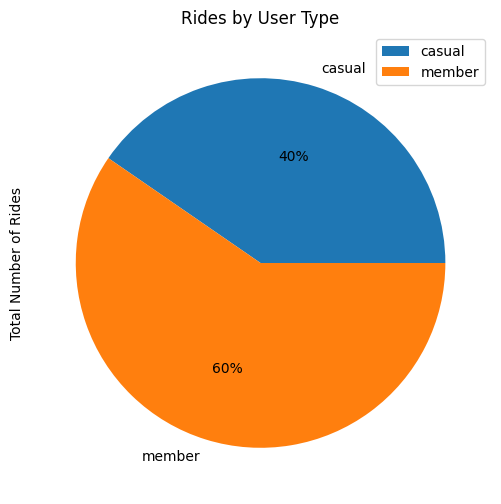

In [13]:
df['ride_id'].plot.pie(x = 'member_casual', ylabel = 'Total Number of Rides', title = 'Rides by User Type', legend=True, autopct = '%1.0f%%', figsize = (6,6))


**Here shows the difference in ride lengths from each group.**
From this visualization we see that casuals prefer much longer rides than members. Through assumption, I believe casual riders prefer getting their moneys worth as well as a lot of tourists use it to ride around the city. 

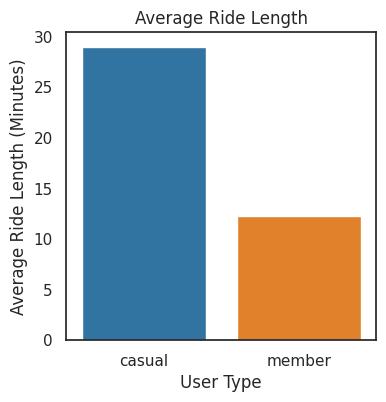

In [14]:
df1 = tripdata[['ride_length', 'member_casual']]
df1 = df1.groupby(['member_casual'], as_index=False)[['ride_length']].mean()

plt.figure(figsize = (4,4))
sns.set_theme(style='white')
sns.barplot(data=df1, x='member_casual', y='ride_length', palette='tab10').set_title('Average Ride Length')

plt.xlabel('User Type')
plt.ylabel('Average Ride Length (Minutes)')
plt.show()

**Below shows which type of bikes is most popular between the different groups.**

As in the table we can now clearly see that casual riders prefer electric bikes more than the classic bikes. Members prefer both equally. This could be a recommendation to get more casuals to members by adding more electric bikes near hotspots in the city.

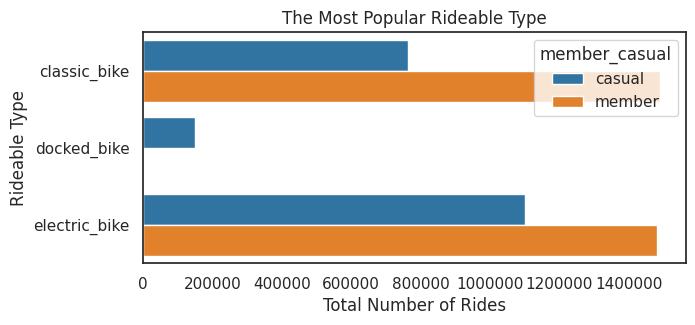

In [15]:
df2 = tripdata[['rideable_type', 'member_casual', 'ride_id']]
df2 = df2.groupby(['rideable_type', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (7,3))
sns.set_theme(style='white')
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(x='ride_id', y='rideable_type', hue='member_casual', palette='tab10', data=df2).set_title('The Most Popular Rideable Type')

plt.xlabel('Total Number of Rides')
plt.ylabel('Rideable Type')
plt.show()

****Now we will visualize how many rides members and casuals are taking each day. From this graph we can see that friday, saturday and sunday are really popular for our casual riders. Our members prefer riding throughout the week. This could possibly be because our members use this service to get to places such as work and school. 

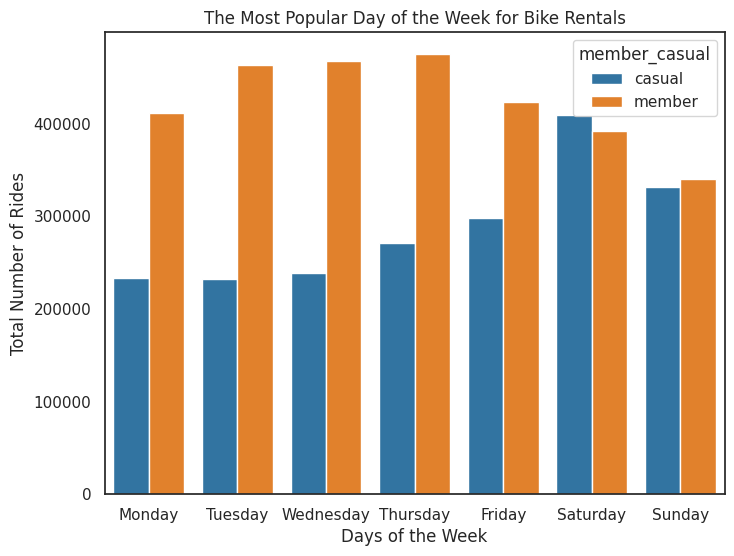

In [16]:
df3 = tripdata[['dayofweek', 'member_casual', 'ride_id']]
df3 = df3.groupby(['dayofweek', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (8,6))
sns.set_theme(style='white')
sns.barplot(data=df3, x='dayofweek', y='ride_id', hue='member_casual', palette='tab10',
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                   'Sunday']).set_title('The Most Popular Day of the Week for Bike Rentals')

plt.xlabel('Days of the Week')
plt.ylabel('Total Number of Rides')
plt.show()

****Similarly to the graph above, we will check how many rides each group is taking every month. We can see that during the winter months november-march not many riders are taking rides from each group. Summer time both groups are outside using bikes more frequently especially June and July where our casuals are almost taking just as much more rides than our members. 

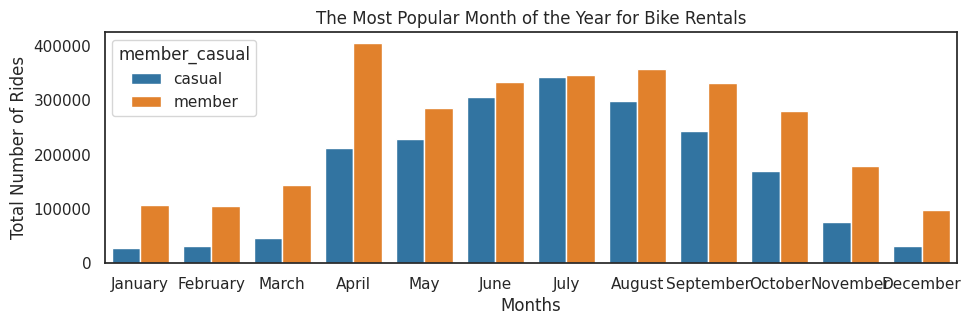

In [17]:
df4 = tripdata[['month', 'member_casual', 'ride_id']]
df4 = df4.groupby(['month', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (11,3))
sns.set_theme(style='white')
sns.barplot(data=df4, x='month', y='ride_id', hue='member_casual', palette='tab10', 
            order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
                   'October', 'November', 'December']).set_title('The Most Popular Month of the Year for Bike Rentals'),

plt.xlabel('Months')
plt.ylabel('Total Number of Rides')
plt.show()

**From the graph illustrated below, we notice that casuals take much longer on their rides than members. We also notice that for both groups, rides get longer during the weekend starting Friday and ending on Sunday. **

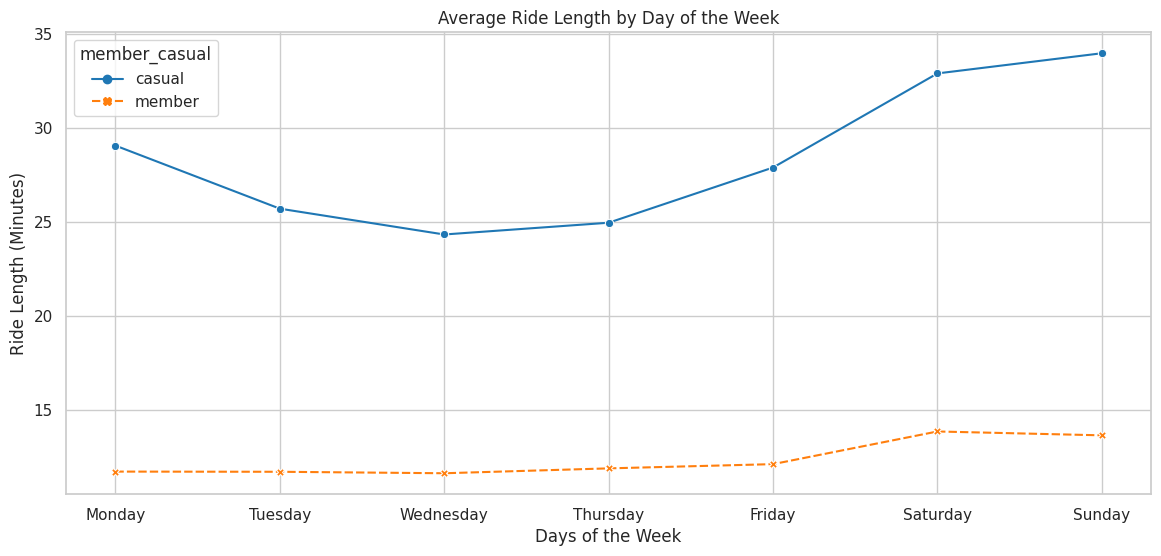

In [18]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
tripdata['dayofweek'] = tripdata['dayofweek'].astype(cat_type)
df5 = tripdata.copy()

df5 = tripdata[['dayofweek', 'member_casual', 'ride_length']]
df5 = df5.groupby(['dayofweek', 'member_casual'], as_index=False)[['ride_length']].mean()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df5, x='dayofweek', y='ride_length', hue='member_casual', style='member_casual', palette='tab10', 
             markers=True).set_title('Average Ride Length by Day of the Week')

plt.xlabel('Days of the Week')
plt.ylabel('Ride Length (Minutes)')
plt.show()

**For both groups the graph below shows similar trends. Queit during the winter months and busy during the summer reaching the peak during June. **

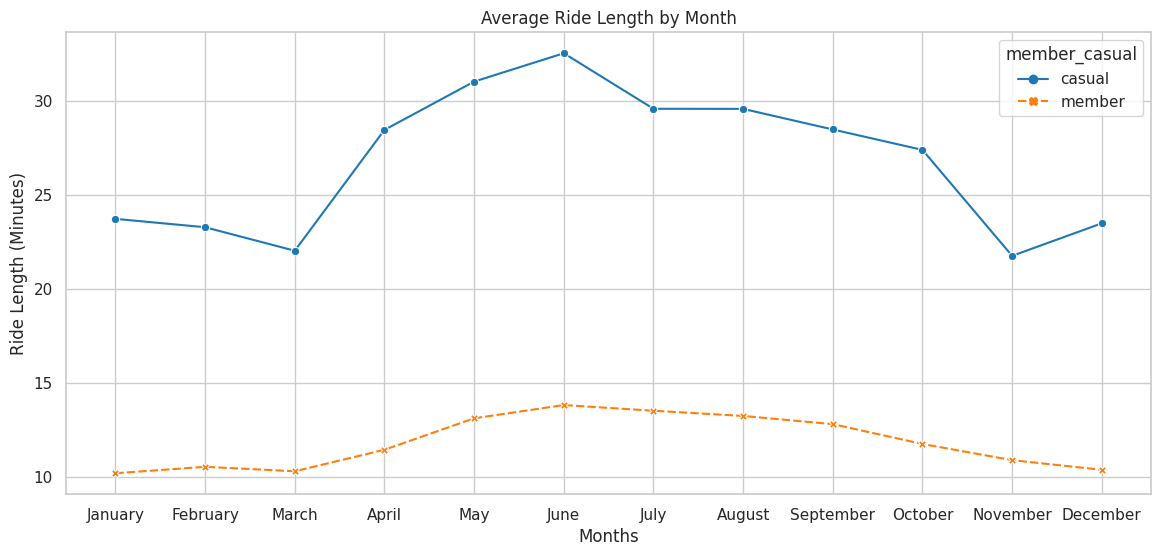

In [19]:
cats = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cat_type = CategoricalDtype(categories=cats, ordered=True)
tripdata['month'] = tripdata['month'].astype(cat_type)
df6 = tripdata.copy()

df6 = tripdata[['month', 'member_casual', 'ride_length']]
df6 = df6.groupby(['month', 'member_casual'], as_index=False)[['ride_length']].mean()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df6, x='month', y='ride_length', hue='member_casual', palette='tab10', 
             style='member_casual', markers=True).set_title('Average Ride Length by Month')
plt.xlabel('Months')
plt.ylabel('Ride Length (Minutes)')
plt.show()

**Finally the last graph illustrates the times each group is taking rides. We notice members get much more active in the morning between 5-10am which could mean that members are using these services for work or school early in the morning. Between 10am-3pm it slowly builds up where it finally reaches it's peak between 3pm-6pm. It then finally starts dying out after 7pm. Casual riders follow a very similar trend. **

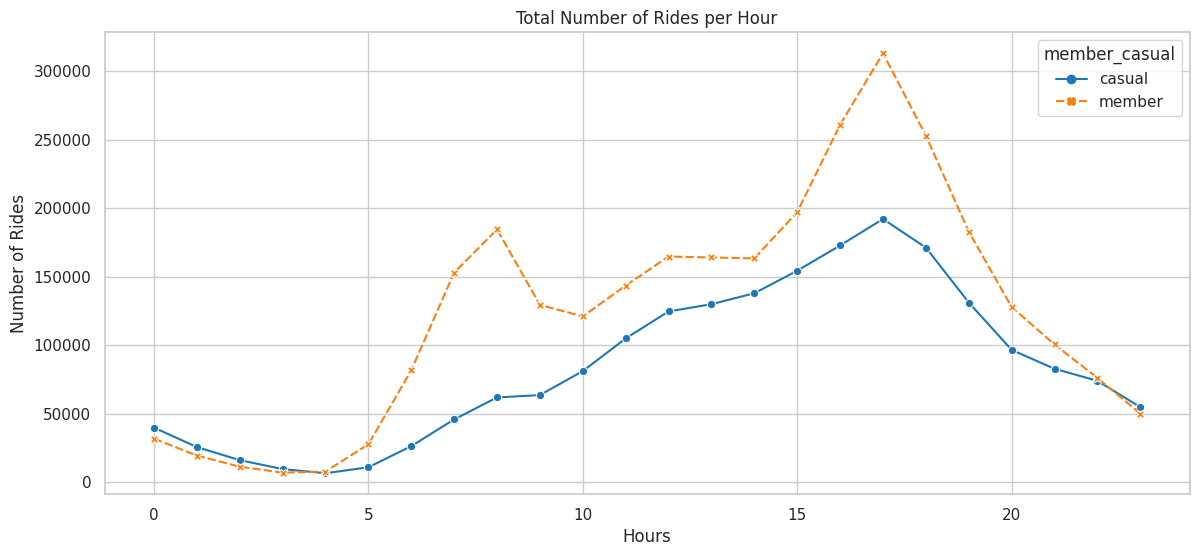

In [20]:
df7 = tripdata[['hour', 'member_casual', 'ride_id']]
df7 = df7.groupby(['hour', 'member_casual'], as_index=False)[['ride_id']].count()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df7, x='hour', y='ride_id', hue='member_casual', palette='tab10',
             style='member_casual', markers=True).set_title('Total Number of Rides per Hour')
plt.xlabel('Hours')
plt.ylabel('Number of Rides')
plt.show()


**Now based on all of this information, let us go back to the three main questions we are trying to answer. **

1. How do annual members and casual riders use Cyclistic bikes differently?
Members consists of 60% of all rides taken. They take much shorter trips and are usually more active during the weekdays, which could mean they are using it to get to school/work. Members prefer both electric and classic bikes equally. Casual riders consists of 40% of rides taken. Compared to members, they take much longer trips and prefer electric bikes. 
2. Why would casual riders buy Cyclistic annual memberships?
If we were to try and convert casual riders to members, the first thing I would recommend is advertising it much more during the summer months starting from April. That is when we see a lot more casuals starting to use bikes. I would also invest in more electric bikes as we can see almost their is about 400000 more casual riders that take electric bikes as opposed to classic bikes. 
3. How can Cyclistic use digital media to influence casual riders to become members?
As stated above, I would use digital media to start marketing it as early as April for all riders. I would put advertisements during peak hours and try and show casual riders how you can use the riding services to commute to work/school and not only for pleasure. 